<a href="https://colab.research.google.com/github/antocommi/provagcp/blob/master/Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
SEED = 9126

import os, cv2, json, time, math, sys, pickle
from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau

from PIL import Image
import pandas as pd
import numpy as np
np.random.seed(SEED)
import seaborn as sn

#from vmz import models
#import mmaction

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedKFold

from google.colab import drive
drive.mount('/content/drive')

np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
USE_CUDA = True
CUDA = USE_CUDA and torch.cuda.is_available()
device = torch.device("cuda" if CUDA else "cpu")
if CUDA:
    print('run on %s' % device)

Mounted at /content/drive


In [2]:
print("Modelli Trovati") 
%ls drive/MyDrive/Pesi\ S3D\ StepLR/*.pth 

Modelli Trovati
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.0001_e4_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.0001_e5_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.0001_e6_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.0001_e7_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.0001_e8_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.001_e0_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.001_e1_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.001_e2_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr0.001_e3_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr1.0000000000000002e-06_e14_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr1.0000000000000002e-06_e15_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr1.0000000000000002e-06_e16_1615156477.pth'
'drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr1.0000000000000002e-06_e17_1615156477.pth'
'drive/MyDrive/Pesi S3D

model name: drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr1.0000000000000002e-07_e22_1615156477.pth


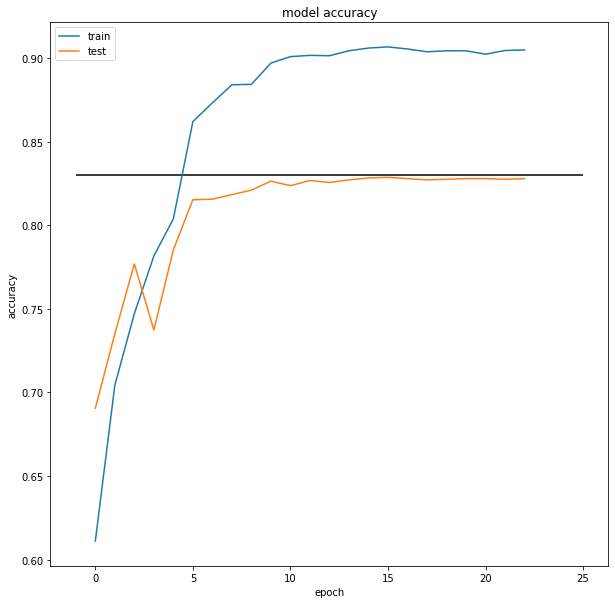

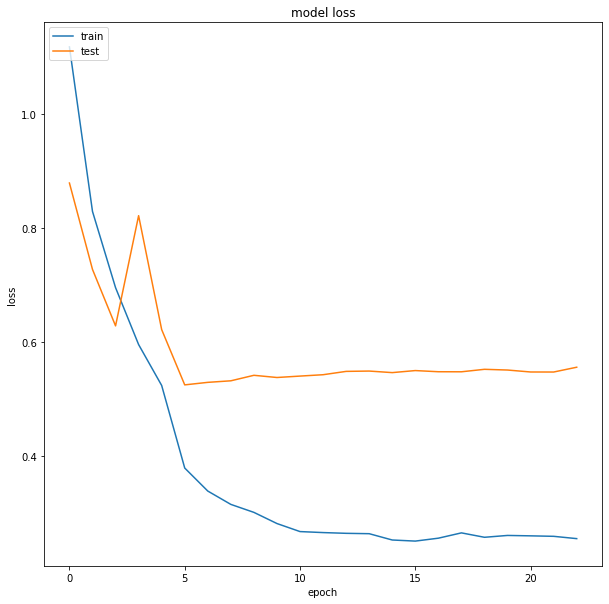

In [11]:
models = ['drive/MyDrive/Pesi S3D StepLR/_S3D_Adam_lr1.0000000000000002e-07_e22_1615156477.pth']
for model in models: 
  checkpoint_init = torch.load(model, map_location=device)
  starting_epoch = checkpoint_init['epoch'] + 1 
  tr_loss, val_loss = checkpoint_init['losses']
  tr_accs, val_accs = checkpoint_init['accs']
  print("model name: " + model)
  
  plt.figure(figsize=(10,10))
  plt.plot(tr_accs)
  plt.plot(val_accs)
  plt.hlines(0.83, -1, 25)
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.figure(figsize=(10,10))
  plt.plot(tr_loss)
  plt.plot(val_loss)
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()